<a href="https://colab.research.google.com/github/leonmarienga/Android-app/blob/main/fraud.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')
sns.set(style='whitegrid')

In [3]:
df = pd.read_csv('/content/AIML Dataset.csv')
df.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0.0,0.0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0.0,0.0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1.0,0.0
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1.0,0.0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0.0,0.0


In [4]:
df.info()
#data types

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 192593 entries, 0 to 192592
Data columns (total 11 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   step            192593 non-null  int64  
 1   type            192593 non-null  object 
 2   amount          192593 non-null  float64
 3   nameOrig        192592 non-null  object 
 4   oldbalanceOrg   192592 non-null  float64
 5   newbalanceOrig  192592 non-null  float64
 6   nameDest        192592 non-null  object 
 7   oldbalanceDest  192592 non-null  float64
 8   newbalanceDest  192592 non-null  float64
 9   isFraud         192592 non-null  float64
 10  isFlaggedFraud  192592 non-null  float64
dtypes: float64(7), int64(1), object(3)
memory usage: 16.2+ MB


In [5]:
df.columns

Index(['step', 'type', 'amount', 'nameOrig', 'oldbalanceOrg', 'newbalanceOrig',
       'nameDest', 'oldbalanceDest', 'newbalanceDest', 'isFraud',
       'isFlaggedFraud'],
      dtype='object')

In [6]:
df['isFraud'].value_counts() #see all  uniques values

,count
isFraud,
0.0,192449
1.0,143


In [7]:
df['isFlaggedFraud'].value_counts()

,count
isFlaggedFraud,
0.0,192592


In [8]:
df.isnull().sum()

,0
step,0
type,0
amount,0
nameOrig,1
oldbalanceOrg,1
newbalanceOrig,1
nameDest,1
oldbalanceDest,1
newbalanceDest,1
isFraud,1


In [9]:
df.shape

(192593, 11)

In [10]:
df = df.dropna()
#remove rows with null values

In [11]:
df['isFraud'].value_counts()

,count
isFraud,
0.0,192449
1.0,143


In [12]:
df.isnull().sum()

,0
step,0
type,0
amount,0
nameOrig,0
oldbalanceOrg,0
newbalanceOrig,0
nameDest,0
oldbalanceDest,0
newbalanceDest,0
isFraud,0


In [13]:
round(df['isFraud'].value_counts()[1] / df.shape[0] * 100,2)
# percentage of frauds, rounded to the nearest 2 dp

np.float64(0.07)

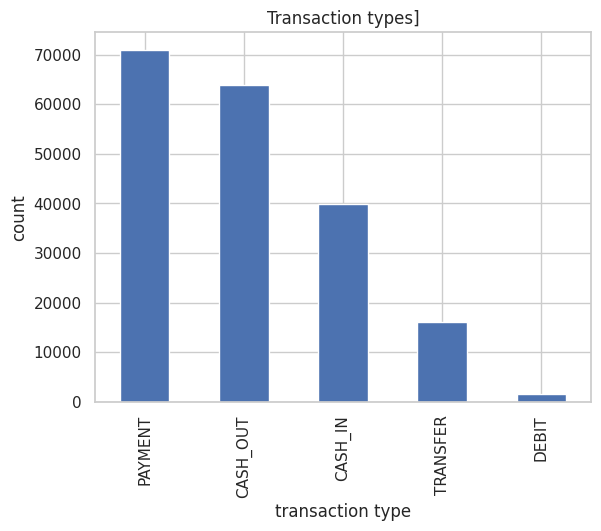

In [14]:
df['type'].value_counts().plot(kind ='bar', title='Transaction types]')
plt.xlabel('transaction type')
plt.ylabel('count')
plt.show()

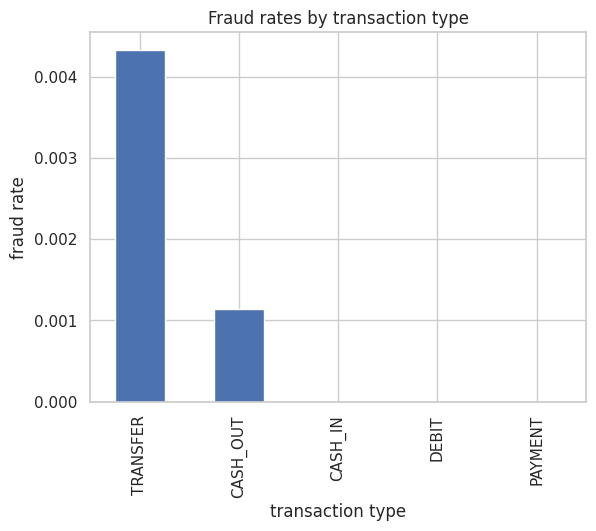

In [15]:
fraud_rates_by_type = df.groupby('type')['isFraud'].mean().sort_values(ascending=False)
fraud_rates_by_type.plot(kind='bar', title='Fraud rates by transaction type')
plt.xlabel('transaction type')
plt.ylabel('fraud rate')
plt.show()


In [16]:
df['amount'].describe().astype('int')

,amount
count,192592
mean,180809
std,330876
min,0
25%,11928
50%,67952
75%,228698
max,10000000


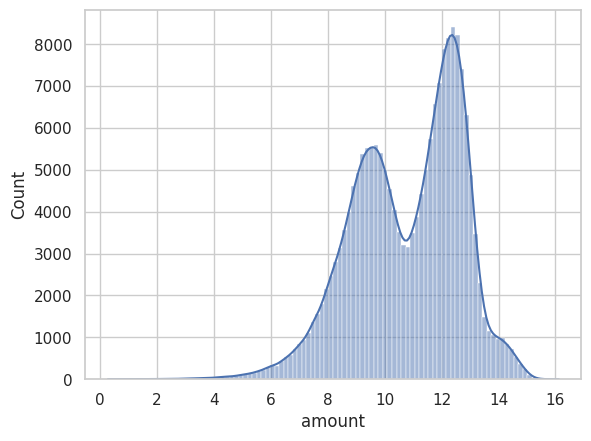

In [17]:
sns.histplot(np.log1p(df['amount']), bins=100, kde=True)#reduces the focus on exponential values and eliminates the effects of log(0)
plt.show()

**shows there are 2 dominant transaction**

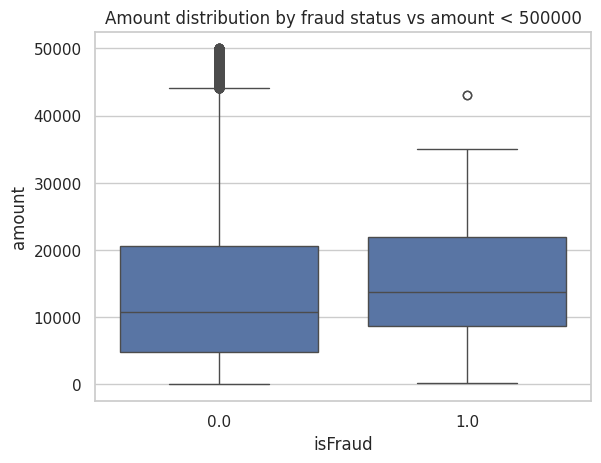

In [18]:
sns.boxplot(x='isFraud', y='amount', data=df[df['amount']<50000])
plt.title('Amount distribution by fraud status vs amount < 50000')
plt.show()

shows the range

11 min
